# Importing Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

In [73]:
file_path = '..\datasets\data_wildlife_trafficking.xlsx'
xls = pd.ExcelFile(file_path)

# sheet_name=0 is the first sheet and header = 2 means use the third row as header because 
# the first 2 rows contain unnecessary and empty fields
df = pd.read_excel(file_path, sheet_name=0, header=2)

# Data Preparation

## Data Cleaning

In [74]:
# Removing NaN and duplicates
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,Iso3_code,Country,Region,Subregion,Year,Indicator,Taxonomic group,Unit of measurement,VALUE
0,ALB,Albania,Europe,Southern Europe,2002-2019,Origin of seizures,Live reptiles,live equivalent,1.000000
1,DZA,Algeria,Africa,Northern Africa,2002-2019,Origin of seizures,Live reptiles,live equivalent,97.000000
2,DZA,Algeria,Africa,Northern Africa,2007-2018,Origin of seizures,Elephant tusks,quantity in kg,4.360000
3,AGO,Angola,Africa,Sub-Saharan Africa,2002-2019,Origin of seizures,Pangolins,live equivalent,2486.666556
4,AGO,Angola,Africa,Sub-Saharan Africa,2002-2019,Origin of seizures,Rhino horns,quantity in kg,7.000000
...,...,...,...,...,...,...,...,...,...
559,ZMB,Zambia,Africa,Sub-Saharan Africa,2007-2018,Origin of seizures,Elephant tusks,quantity in kg,229.500000
560,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,2015-2019,Destination of seizures,Elephant tusks,quantity in kg,499.000000
561,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,2002-2019,Origin of seizures,Rhino horns,quantity in kg,23.650000
562,ZWE,Zimbabwe,Africa,Sub-Saharan Africa,2005-2017,Origin of seizures,Pangolins,live equivalent,9.000000


## Data Manipulation

In [75]:
# Setting the Year to the initial year provided in the data
df_cleaned['Year'] = df_cleaned['Year'].str.split('-').str[0].astype(int)

# Data Visualization

## Total wildlife trafficking volume per country

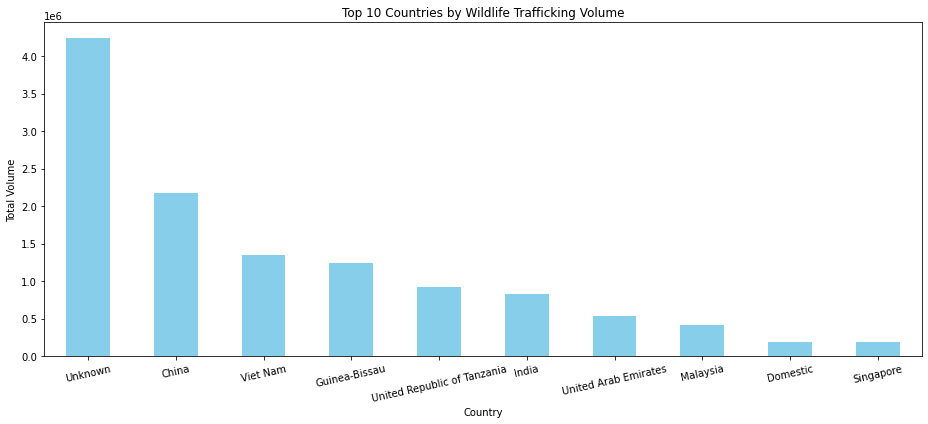

In [76]:
df_country_volume = df_cleaned.groupby('Country')['VALUE'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(13, 6))
df_country_volume.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Wildlife Trafficking Volume')
plt.xlabel('Country')
plt.ylabel('Total Volume')
plt.xticks(rotation=12.5)
plt.tight_layout()
plt.show()

## Trafficking by Indicator type

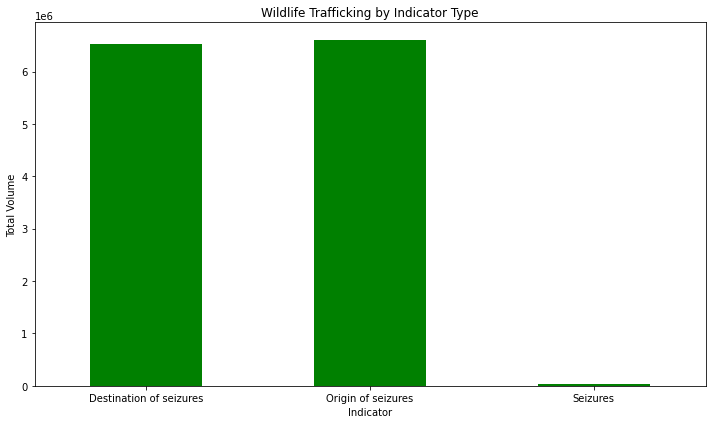

In [77]:
df_indicator = df_cleaned.groupby('Indicator')['VALUE'].sum()

# Plot
plt.figure(figsize=(10, 6))
df_indicator.plot(kind='bar', color='green')
plt.title('Wildlife Trafficking by Indicator Type')
plt.xlabel('Indicator')
plt.ylabel('Total Volume')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Trafficking volume over the years

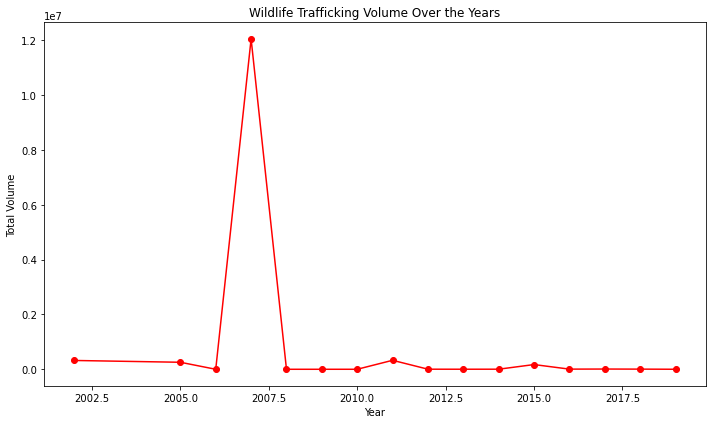

In [78]:
df_yearly_traffic = df_cleaned.groupby('Year')['VALUE'].sum()

# Plot
plt.figure(figsize=(10, 6))
df_yearly_traffic.plot(kind='line', marker='o', color='red')
plt.title('Wildlife Trafficking Volume Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.tight_layout()
plt.show()


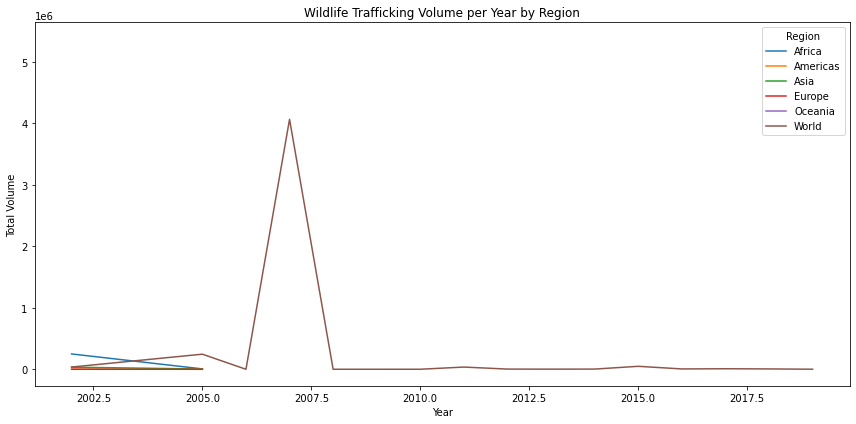

In [85]:
df_region_year = df_cleaned.groupby(['Region', 'Year'])['VALUE'].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))

for region in df_region_year.index:
    plt.plot(df_region_year.columns, df_region_year.loc[region], label=region)

plt.title('Wildlife Trafficking Volume per Year by Region')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.legend(title='Region')  

plt.tight_layout()
plt.show()
